In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as soup
import json
import time

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [13]:
# Read in all data to dataframe
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data.csv'
data = pd.read_csv(path)
# data.drop(columns = ['Unnamed: 0'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15588 entries, 0 to 15587
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               15588 non-null  object 
 1   property_name     15588 non-null  object 
 2   city              15588 non-null  object 
 3   rent_updated      15588 non-null  float64
 4   n_bed             15588 non-null  int64  
 5   n_bath            15588 non-null  float64
 6   sq_ft_updated     15588 non-null  float64
 7   walkscore         15588 non-null  float64
 8   allow_pet         15588 non-null  int64  
 9   minimum_lease     15588 non-null  int64  
 10  onsite_parking    15588 non-null  int64  
 11  pool              15588 non-null  int64  
 12  fitness_center    15588 non-null  int64  
 13  elevator          15588 non-null  int64  
 14  kitchen_features  15588 non-null  int64  
 15  security_system   15588 non-null  int64  
 16  washer_dryer      15588 non-null  int64 

In [14]:
# Read in the data with no range
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data_norange.csv'
data_norange = pd.read_csv(path)
# data_norange.drop(columns = ['Unnamed: 0','rent_range','sq_ft_range'], inplace = True)
data_norange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122 entries, 0 to 7121
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               7122 non-null   object 
 1   property_name     7122 non-null   object 
 2   city              7122 non-null   object 
 3   rent_updated      7122 non-null   float64
 4   n_bed             7122 non-null   int64  
 5   n_bath            7122 non-null   float64
 6   sq_ft_updated     7122 non-null   float64
 7   walkscore         7122 non-null   float64
 8   allow_pet         7122 non-null   int64  
 9   minimum_lease     7122 non-null   int64  
 10  onsite_parking    7122 non-null   int64  
 11  pool              7122 non-null   int64  
 12  fitness_center    7122 non-null   int64  
 13  elevator          7122 non-null   int64  
 14  kitchen_features  7122 non-null   int64  
 15  security_system   7122 non-null   int64  
 16  washer_dryer      7122 non-null   int64  


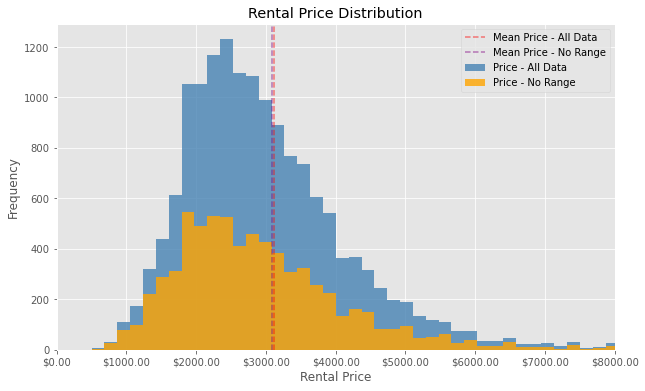

In [46]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(data['rent_updated'], bins = 350, color = 'steelblue',alpha = 0.8, label = 'Price - All Data')
ax.axvline(x = np.mean(data['rent_updated']), c ='red', alpha = 0.5, linestyle = '--', label = 'Mean Price - All Data')
ax.hist(data_norange['rent_updated'], bins = 350, color = 'orange',  alpha = 0.8, label = 'Price - No Range')
ax.axvline(x = np.mean(data_norange['rent_updated']), c ='purple', alpha = 0.5, linestyle = '--', label = 'Mean Price - No Range')
ax.set_xlim(left = 0, right = 8000)
ax.xaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('Rental Price')
ax.set_ylabel('Frequency')
ax.set_title('Rental Price Distribution')
ax.legend()

(array([5.990e+02, 2.870e+02, 2.200e+01, 8.200e+01, 1.190e+02, 2.369e+03,
        1.216e+03, 7.580e+02, 2.071e+03, 3.300e+02, 3.000e+00, 1.570e+02,
        4.600e+01, 2.310e+02, 1.600e+01, 9.350e+02, 1.710e+02, 4.330e+02,
        1.500e+02, 1.200e+01, 7.000e+00, 1.690e+02, 1.580e+02, 1.700e+01,
        1.920e+02, 6.900e+01, 3.830e+02, 2.000e+01, 2.000e+00, 3.600e+01,
        1.450e+02, 5.900e+01, 3.400e+01, 2.960e+02, 3.660e+02, 2.640e+02,
        1.860e+02, 4.300e+01, 6.000e+01, 2.000e+00, 1.800e+01, 1.500e+01,
        6.500e+01, 9.000e+00, 4.000e+01, 3.900e+01, 4.400e+01, 7.300e+01,
        2.800e+01, 2.600e+01, 3.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
        2.000e+00, 8.000e+00, 1.000e+00, 1.000e+00, 1.500e+01, 1.600e+01,
        2.000e+00, 5.000e+01, 3.100e+01, 1.000e+01, 1.000e+00, 1.130e+02,
        3.180e+02, 6.000e+01, 3.800e+01, 5.000e+01, 2.400e+01, 4.670e+02,
        3.000e+00, 3.300e+01, 1.930e+02, 4.500e+01, 2.800e+01, 2.000e+01,
        6.000e+00, 2.300e+01, 1.300e+0

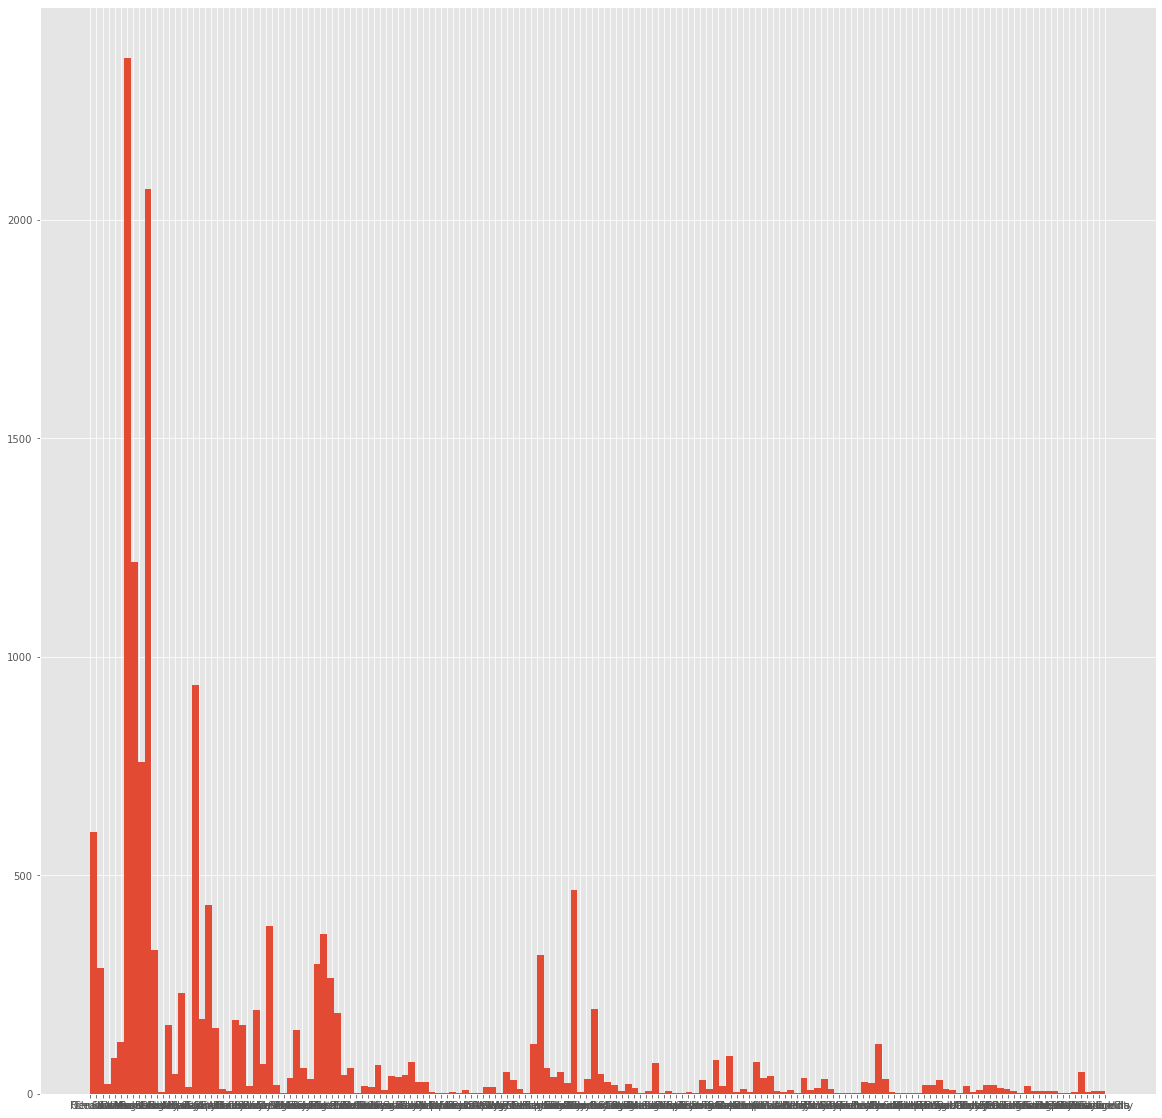

In [65]:
fig, ax = plt.subplots(figsize = (20,20))
ax.hist(data['city'], bins = 150)

In [60]:
def plot_top_cities(data, color, title):
    city_lst = []
    cities, count = np.unique(data['city'].to_numpy(), return_counts = True)
    for city, n in zip(cities, count):
        city_lst.append((city, n))

    sorted_city = sorted(city_lst,key=lambda x: x[1], reverse=True)
    top5_cities = [x[0] for x in sorted_city[:5]][::-1]
    top5_n = [x[1] for x in sorted_city[:5]][::-1]
    
    fig, ax = plt.subplots(figsize = (6,4))

    ax.barh(top5_cities, top5_n, color = color)
    ax.set_xlabel('Number of Listings')
    ax.set_title(title)

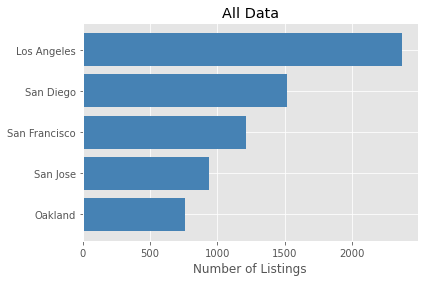

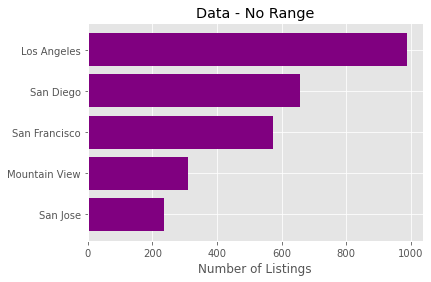

In [64]:
ax1 = plot_top_cities(data,'steelblue', 'All Data')
ax2 = plot_top_cities(data_norange, 'purple','Data - No Range')

In [34]:
def plot_aptsize_heatmap(data, ax, color):
    data1 = data.rename(columns = {'rent_updated':'Rental Price','n_bed':'Number of Beds',
                                   'n_bath':'Number of Baths', 'sq_ft_updated':'SQ-FT'})
    corr_matrix = data1[['Rental Price', 'Number of Beds', 'Number of Baths', 'SQ-FT']].corr()
    chart = sns.heatmap(corr_matrix,annot=True,ax=ax, square=True, cmap = color,fmt='0.0%', cbar = False)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

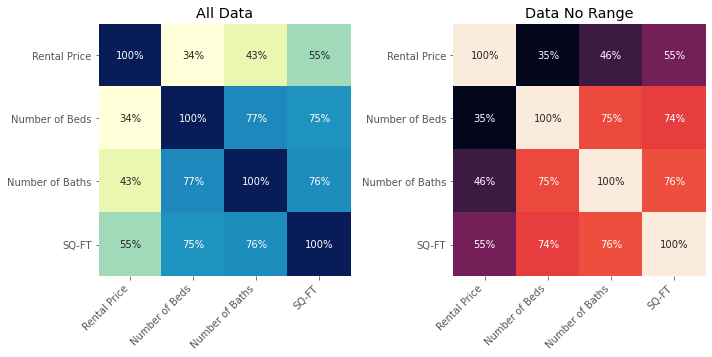

In [38]:
fig, axs = plt.subplots(1,2, figsize = (10,10))
plot_aptsize_heatmap(data, axs[0], "YlGnBu")
plot_aptsize_heatmap(data_norange, axs[1], None)
axs[0].set_title('All Data')
axs[1].set_title('Data No Range')
fig.tight_layout()

In [47]:
data.columns

Index(['url', 'property_name', 'city', 'rent_updated', 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished'],
      dtype='object')

In [48]:
binary_data = data[['allow_pet', 'onsite_parking', 'pool', 'fitness_center', 'elevator',
      'security_system', 'washer_dryer', 'internet','air_conditioning', 'furnished']]

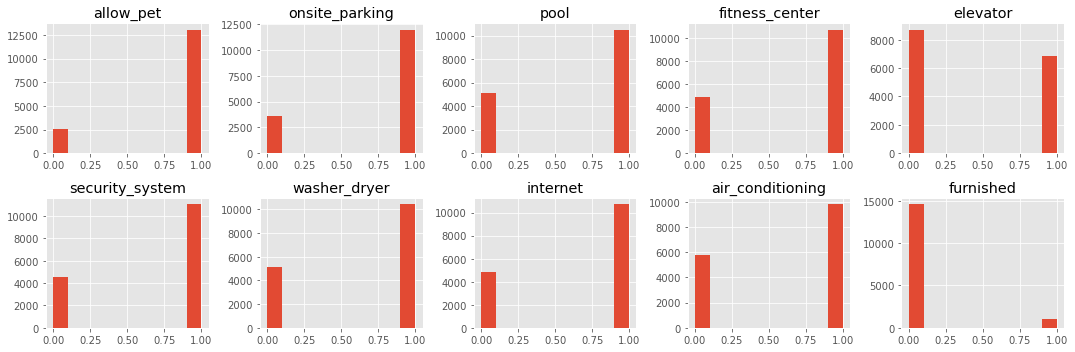

In [54]:
fig,axs = plt.subplots(2,5,figsize = (15,5))
for i, ax in enumerate(axs.flatten()):
    ax.hist(data[binary_data.columns[i]])
    ax.set_title(binary_data.columns[i])

fig.tight_layout()